In [36]:
# Import all necessary dependencies
import pypdf

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

from textblob import TextBlob
import spacy

from gensim.models import LdaModel
from gensim.corpora import Dictionary

import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import string
import os

In [56]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vicuko/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vicuko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/vicuko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [23]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = pypdf.PdfReader(pdf_file)
        num_pages = len(pdf_reader.pages)
        text = ""
        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text 

In [82]:
def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = " ".join(text.split())
    return text

In [83]:
def preprocess_text_with_punctuation(text):
    text = text.lower()
    punctuation_to_keep = '.?!'
    text = "".join([char if char in punctuation_to_keep or char not in string.punctuation else ' ' for char in text])
    text = " ".join(text.split())
    return text

In [25]:
def tokenize_text(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return words, sentences

In [26]:
def generate_word_cloud(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('spanish'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    word_counts = Counter(filtered_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.show()

In [85]:
def combine_all_pdfs_text(pdf_folder_path):
    # Get all pdf files in folder
    pdf_files = [f for f in os.listdir(pdf_folder_path) if f.endswith('.pdf')]

    all_text = ""
    for pdf_file in pdf_files:
        pdf_path = os.path.join(pdf_folder_path, pdf_file)
        print("pdf_path", pdf_path)

        # Extract and preprocess the text
        text = extract_text_from_pdf(pdf_path)
        all_text += preprocessed_text + " "

    return all_text

pdf_path ../sentencias/Demanda en entrega de documentos-0891-2023.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0424-2022.pdf
pdf_path ../sentencias/Demanda en nulidad del embargo retentivo-0137-2023.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0406-2022.pdf
pdf_path ../sentencias/Demanda en entrega de documentos 1130-2023.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0907-2023.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0590-2022.pdf
pdf_path ../sentencias/Demanda en suspensión en cobri-0435-2022.pdf
pdf_path ../sentencias/Demanda en entrega de documentos-0013-2023.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0075-2022.pdf
pdf_path ../sentencias/Demanda en entrega de documentos-0441-2022.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0387-2022.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0529-2022.pdf
pdf_path ../sentencias/Levantamiento de embargo retentivo-0415-2022.pd

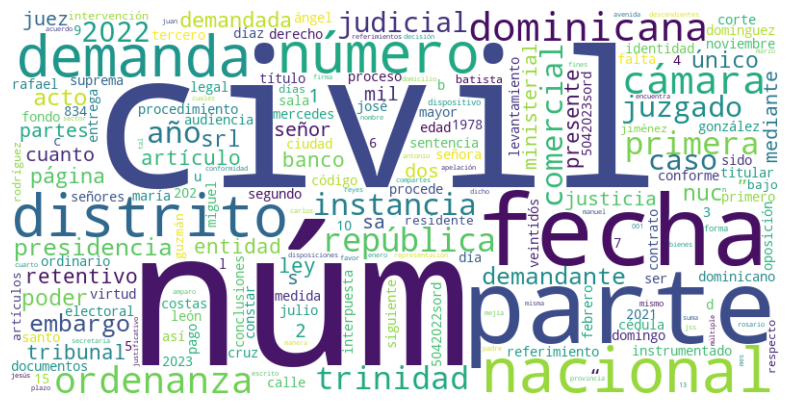

In [88]:
all_pdfs_text = combine_all_pdfs_text('../sentencias')
preprocessed_text = preprocess_text(all_pdfs_text)

# Generate and display the word cloud
print(f"\nWord Cloud for all pdfs:")
generate_word_cloud(preprocessed_text)

In [93]:
# Tokenize combined text
preprocessed_text_2 = preprocess_text_with_punctuation(all_pdfs_text)
words, _ = tokenize_text(preprocessed_text)
_, sentences = tokenize_text(preprocessed_text_2)

In [94]:
# Perform other analyses:
# Word Frequency
df_words = pd.DataFrame(Counter(words).most_common(), columns=['Word', 'Frequency'])

# Remove stop words
stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in words if word not in stop_words]
df_words_no_stop = pd.DataFrame(Counter(filtered_words).most_common(), columns=['Word', 'Frequency'])

chart1 = alt.Chart(df_words_no_stop.head(20)).mark_bar().encode(
    x=alt.X('Word:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['Word', 'Frequency']
).properties(title='Top 20 Most Frequent Words (Excluding Stop Words)').interactive()
chart1.display()


alt.Chart(...)

In [95]:
# N-grams
bigrams = list(nltk.bigrams(words))
df_bigrams = pd.DataFrame(Counter(bigrams).most_common(), columns=['Bigram', 'Frequency'])
df_bigrams['Bigram'] = df_bigrams['Bigram'].astype(str)

chart2 = alt.Chart(df_bigrams.head(10)).mark_bar().encode(
    x=alt.X('Bigram:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['Bigram', 'Frequency']
).properties(title='Top 10 Most Frequent Bigrams').interactive()
chart2.display()


alt.Chart(...)

In [96]:
trigrams = list(nltk.trigrams(words))
df_trigrams = pd.DataFrame(Counter(trigrams).most_common(), columns=['Trigram', 'Frequency'])
df_trigrams['Trigram'] = df_trigrams['Trigram'].astype(str)


chart3 = alt.Chart(df_trigrams.head(10)).mark_bar().encode(
    x=alt.X('Trigram:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['Trigram', 'Frequency']
).properties(title='Top 10 Most Frequent Trigrams').interactive()
chart3.display()


alt.Chart(...)

In [73]:
# Sentiment Analysis
sentiments = [TextBlob(sentence).sentiment for sentence in sentences]
df_sentiment = pd.DataFrame({'Sentence': sentences, 'Polarity': [s.polarity for s in sentiments], 'Subjectivity': [s.subjectivity for s in sentiments]})

chart4 = alt.Chart(df_sentiment).mark_bar().encode(
    x=alt.X('Polarity:Q', bin=True),
    y=alt.Y('count()', title='Number of Sentences'),
    tooltip = [alt.Tooltip('Polarity:Q', bin=True), 'count()']
).properties(title='Distribution of Sentiment Polarity').interactive()

chart5 = alt.Chart(df_sentiment).mark_circle().encode(
    x='Polarity',
    y='Subjectivity',
    tooltip = ['Polarity', 'Subjectivity']
).properties(title='Sentiment Polarity vs Subjectivity').interactive()

print(df_sentiment)

chart4.display()
chart5.display()


                                            Sentence  Polarity  Subjectivity
0  república dominicana poder judicial presidenci...  0.061096      0.371779


alt.Chart(...)

alt.Chart(...)

In [97]:
# Sentence Length
print (sentences)
sentence_lengths = [len(sentence.split()) for sentence in sentences]
df_sentence_length = pd.DataFrame({'Sentence': sentences, 'Length': sentence_lengths})

print(df_sentence_length)

chart6 = alt.Chart(df_sentence_length).mark_bar().encode(
    x=alt.X('Length:Q', bin=True),
    y=alt.Y('count()', title='Number of Sentences'),
    tooltip = [alt.Tooltip('Length:Q', bin=True), 'count()']
).properties(title='Distribution of Sentence Lengths').interactive()
chart6.display()

['república dominicana poder judicial presidencia de la cámara civil y comercial del juzgado de primera instancia del distrito nacional ordenanza civil núm.', '504 2023 sord 0891 número único de caso nuc 2023 0035480 jss .', 'página 1 de 13 en nombre de la república ordenanza civil núm.', '504 2023 sord 0891 número de caso único nuc 2023 0035480 en la ciudad de santo domingo de guzmán distrito nacional capital de la república dominicana a los veintitrés 23 días del mes de mayo del año dos mil veintitrés 2023 año ciento ochenta 180 de la independencia y ciento sesenta 160 de la restauración.', 'presidencia de la cámara civil y comercial del juzgado de primera instancia del distrito nacional localizada en el primer pi so del palacio de justicia del centro de los héroes de constanza maimón y estero hondo en el distrito nacional república dominicana presidida por miguel ángel díaz villalona quien dicta esta ordenanza en sus atribuciones de juez presidente de los refe rimientos y en audienc

alt.Chart(...)

In [101]:
# POS Tagging
pos_tags = nltk.pos_tag(words)
df_pos_tags = pd.DataFrame(Counter([tag for _, tag in pos_tags]).most_common(), columns=['POS Tag', 'Frequency'])

print (df_pos_tags)

chart7 = alt.Chart(df_pos_tags).mark_bar().encode(
    x=alt.X('POS Tag:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['POS Tag', 'Frequency']
).properties(title='Frequency of POS Tags').interactive()

chart7.display()

   POS Tag  Frequency
0       NN      29764
1       FW      21280
2       JJ       8015
3       IN       4714
4       CD       4117
5      NNS       2260
6      VBP       1922
7       DT       1454
8      VBZ        909
9       RB        789
10     NNP        600
11     VBD        425
12      VB         87
13      CC         82
14     JJR         58
15       $         40
16      MD         22
17     VBG         16
18     VBN          9
19      TO          8
20      RP          6
21     JJS          5
22     PDT          5
23     PRP          4
24     RBR          3
25    PRP$          1
26     WRB          1


alt.Chart(...)

In [102]:
# NER
nlp = spacy.load("es_core_news_md")  # Load Spanish spaCy model
entities = []
labels = []
for sentence in sentences:
    doc = nlp(sentence)
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
df_ner = pd.DataFrame(Counter(zip(entities, labels)).most_common(), columns=['Entity_Label', 'Frequency'])
df_ner[['Entity', 'Label']] = pd.DataFrame(df_ner['Entity_Label'].tolist(), index=df_ner.index)
df_ner = df_ner[['Label', 'Frequency']] 
df_ner = df_ner.groupby('Label').sum().reset_index()

In [106]:
entity_label_descriptions = {
    'LOC': 'Locations such as geographical entities, buildings, airports, etc.',
    'MISC': 'Miscellaneous entities, not belonging to any of the other categories',
    'ORG': 'Organizations, companies, institutions, etc.',
    'PER': 'People, including names of individuals'
}

df_ner['Description'] = df_ner['Label'].map(entity_label_descriptions)

print (df_ner)

chart8 = alt.Chart(df_ner).mark_bar().encode(
    x=alt.X('Description:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['Description', 'Frequency']
).properties(title='Frequency of Entity Labels').interactive()

chart8.display()

  Label  Frequency                                        Description
0   LOC        264  Locations such as geographical entities, build...
1  MISC        244  Miscellaneous entities, not belonging to any o...
2   ORG        114       Organizations, companies, institutions, etc.
3   PER       1410             People, including names of individuals


alt.Chart(...)

In [116]:
# Topic Modeling
dictionary = Dictionary([filtered_words])

corpus = [dictionary.doc2bow(text) for text in [filtered_words]]
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
topics = lda_model.get_document_topics(corpus[0])
dominant_topics = [lda_model[doc] for doc in corpus]  # Get topic distribution for each sentence
dominant_topics = [max(topics, key=lambda item: item[1])[0] if topics else -1 for topics in dominant_topics] 
# dominant_topics = [max(topics, key=lambda item: item[1])[0] for sentence in sentences]
df_topics = pd.DataFrame(Counter(dominant_topics).most_common(), columns=['Topic', 'Frequency'])

print (df_topics)

chart9 = alt.Chart(df_topics).mark_bar().encode(
    x=alt.X('Topic:N', sort='-y'),
    y=alt.Y('Frequency:Q'),
    tooltip = ['Topic', 'Frequency']
).properties(title='Frequency of Topics').interactive()

chart9.display()

   Topic  Frequency
0      0          1


alt.Chart(...)